In [61]:
import numpy
from finance_utils.asset.spot.base import Spot
from finance_utils.process.prices.gbm import GBM, NormalDistribution
from finance_utils.trader.base import Trader
from matplotlib import pyplot
import numpy

In [62]:
trader = Trader(0, "2024-1-1")
trader2 = Trader(50000 * 12, "2022-1-1")
trader3 = Trader(50000 * 12, "2022-1-1")

In [63]:
stock = Spot("10001", 100, ["day", 1])
# short_stock = Spot("10002", 100)

In [64]:
rv = NormalDistribution(0.03/365, 0.015).rvf(366)

In [65]:
stock_process = GBM(stock, rv, 100, "2024-1-1", "day", 1)

In [66]:
pr_list = []
ir_list = []
ir2_list = []
ir3_list = []
cost2_list = []
cost3_list = []
position3_list = []
# shares_list = []
for i,t in enumerate(stock_process.timeline):
    price_data = stock_process.get_price(t)
    # print(price_data)
    
    if t.day == 1:
        trader.new_investment(50000, t)
        
    if t.day == 2:
        stock.purchased_to(
           trader2, price_data.price, 50000, price_data.timestamp
        )
        if stock.name in trader3.position.keys():
            avg_cost = trader3.position["10001"].holding_cost()
            if price_data.price < avg_cost or trader3.position["10001"].in_position_quantity() == 0:
                stock.purchased_to(trader3, price_data.price, 50000, price_data.timestamp)
            else:
                pass
        else:
            stock.purchased_to(trader3, price_data.price, 50000, price_data.timestamp)
    else:
        if stock.name in trader3.position.keys():
            avg_cost = trader3.position["10001"].holding_cost()
            if price_data.price > avg_cost * 1.1:
                stock.sold_to(trader3, price_data.price, None, price_data.timestamp)
                trader3.position[stock.name].simplify()
            else:
                pass
        else:
            pass
    
    if stock.name in trader2.position.keys():
        cost2_list.append(trader2.position["10001"].holding_cost())
        cost3_list.append(trader3.position["10001"].holding_cost())
        # shares_list.append(trader.position["10001"].in_position_quantity())
        position3_list.append(trader3.position["10001"].in_position_quantity())
    else:
        cost2_list.append(numpy.nan)
        cost3_list.append(numpy.nan)
        position3_list.append(numpy.nan)
        
    
    pr = price_data.price/100
    ir = trader.net_worth_rate(
        **price_data.dic
    )
    ir2 = trader2.net_worth_rate(**price_data.dic)
    ir3 = trader3.net_worth_rate(**price_data.dic)
    pr_list.append(pr)
    ir_list.append(ir)
    ir2_list.append(ir2)
    ir3_list.append(ir3)
        
    # elif t.day == t.last_day_in_month():
    #     stock.sell(trader, p, None, t)
        

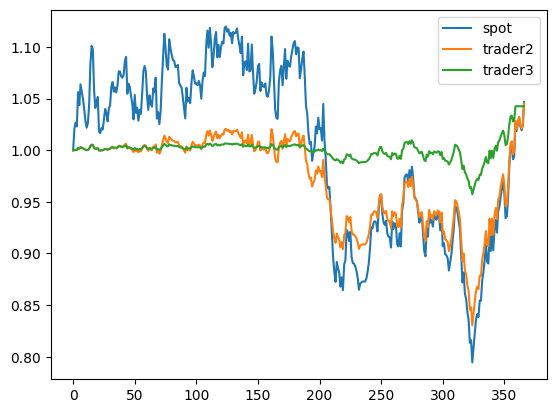

1.0468140449430792
1.0
1.0451646746815018
1.0426688219683933


In [67]:
pyplot.plot(pr_list,label="spot")
# pyplot.plot(ir_list, label="trader")
pyplot.plot(ir2_list, label="trader2")
pyplot.plot(ir3_list, label="trader3")
pyplot.legend()
pyplot.show()
# pyplot.plot(cost_list,label="cost")
# pyplot.show()
# pyplot.plot(numpy.diff(shares_list),label="cost")
# pyplot.show()
print(pr_list[-1])
print(ir_list[-1])
print(ir2_list[-1])
print(ir3_list[-1])

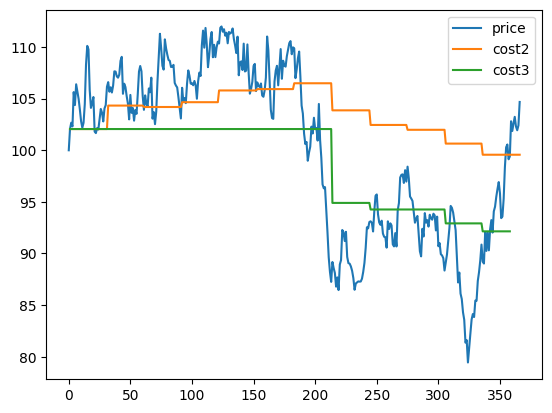

In [68]:
pyplot.plot(stock_process.times_series["price"], label="price")
pyplot.plot(cost2_list,label="cost2")
pyplot.plot(cost3_list,label="cost3")
pyplot.legend()
pyplot.show()

In [69]:
print(position3_list)

[nan, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 

In [70]:
print(cost3_list)

[nan, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.05775196882566, 102.0577519688